# Making figures

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['svg.fonttype'] = 'none'

from leads import kymograph
from leads.utils import hdf5dict
import h5py

In [4]:
params_dict = {
    'font.size' : 12,
    'axes.labelsize': 'medium',
    'xtick.top' : True,
    'ytick.right' : True,
    'axes.labelsize' : 16,
    'xtick.labelsize' : 14,
    'ytick.labelsize' : 14,
    'xtick.top' : True,
    'ytick.right' : True,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'legend.frameon' : False,
    'svg.fonttype' : 'none',
    'pdf.fonttype' : 42,
    'savefig.transparent' : True
}
plt.rcParams.update(params_dict)

## Roadblock statisitcs

In [14]:
filepath = 'AuNP_RoadBlock.xlsx'
sheetnames = ["Nucleosome", "10nmAuNP", "20nmAuNP", "30nmAuNP", "50nmAuNP", "100nmAuNP", "200nmPSB"]

In [15]:
df = pd.read_excel(filepath, sheet_name='Nucleosome', engine='openpyxl',)
df.head()

df = df[df['name'].isnull().values == False] # remove NaN from name column, spaces are removed 
df = df[df['Passed'].isnull().values == False] # remove NaN from Passed column, NAs are removed 

relative_extension = df['end-to-end distance'].values * 0.108 / 17
df['NewStallingForce/pN'] = np.interp(relative_extension, kymograph.RELATIVE_EXTENSION, kymograph.FORCE)

# df['NewStallingForce/pN'] = kymograph.force_wlc(relative_extension, Plen=50)
df_passed = df[df['Passed'] == 1]
df_blocked = df[df['Passed'] == 0]
df_passed.head()

,name,Passed,confidence/%,StallingForce/pN,end-to-end distance,LoopSize,StallingTime/s,time range / s,comments,folderpath,NewStallingForce/pN
1,x175-y969-l48-w65-a0d-f0-f4262_shifted_2.5dx_2...,1.0,100.0,0.32,NaN,11.7,0.0,1320-1500,NaN,20200609_Nsome7_H3Al647\S124d06Jun20-CH8_1uLDN...,NaN
5,x451-y801-l47-w58-a0d-f0-f2460_shifted_2.5dx_2...,1.0,100.0,0.36,NaN,0.0,NaN,900-1100,NaN,20200609_Nsome7_H3Al647\S124d06Jun20-CH8_1uLDN...,NaN
7,x609-y573-l54-w66-a0d-f0-f2460_shifted_2.5dx_2...,1.0,100.0,0.34,NaN,0.0,NaN,700-900,side flow (868) GOOD,NaN,NaN
10,x500-y370-l79-w75-a0d-f0-f4316_shifted_1.15dx_...,1.0,100.0,NaN,NaN,NaN,NaN,NaN,sideflow (GOOD),20200611_Nsome7\S127d11Jun20_A3_0p5nMCond_1_an...,NaN
11,x556-y804-l72-w65-a0d-f0-f4316_shifted_1.15dx_...,1.0,100.0,NaN,NaN,NaN,NaN,NaN,sideflow,NaN,NaN


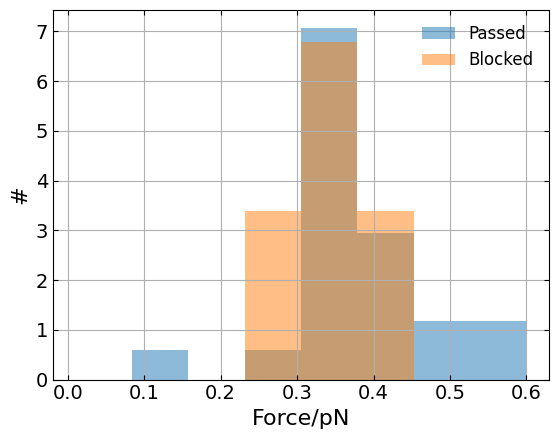

In [16]:
df_passed['StallingForce/pN'].hist(range=(0.01, 0.6), bins=8, density=True, label='Passed', alpha=0.5)
df_blocked['StallingForce/pN'].hist(range=(0.01, 0.6), bins=8, density=True, label='Blocked', alpha=0.5)

plt.xlabel('Force/pN')
plt.ylabel("#")
plt.legend()
plt.savefig('Force_statistics.svg')

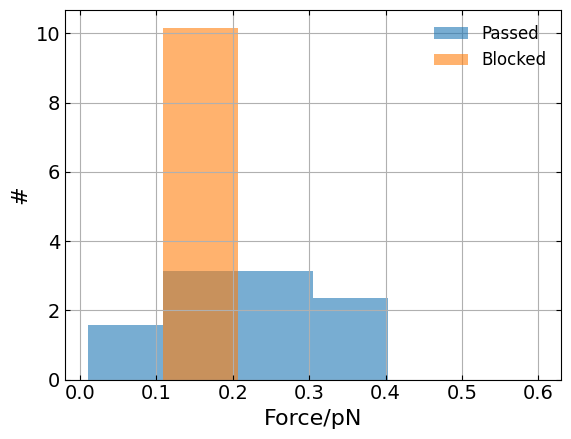

In [17]:
df_passed['NewStallingForce/pN'].dropna().hist(range=(0.01, 0.6), density=True, bins=6, label='Passed', alpha=0.6)
df_blocked['NewStallingForce/pN'].dropna().hist(range=(0.01, 0.6), density=True, bins=6, label='Blocked', alpha=0.6)

plt.xlabel('Force/pN')
plt.ylabel("#")
plt.legend()
plt.savefig('Force_statistics_New.svg')

In [18]:
print(df_passed.shape)
print(df_blocked.shape)

(53, 11)
(7, 11)


In [19]:
sheetnames_passed = []
sheetnames_blocked = []
for sheet in sheetnames:
    df = pd.read_excel(filepath, sheet_name=sheet)
    df = df[df['name'].isnull().values == False] # remove NaN from name column, spaces are removed 
    df = df[df['Passed'].isnull().values == False] # remove NaN from Passed column, NAs are removed 
    df_passed = df[df['Passed'] == 1]
    df_blocked = df[df['Passed'] == 0]
    sheetnames_passed.append(df_passed.shape[0])
    sheetnames_blocked.append(df_blocked.shape[0])
sheetnames_passed = np.array(sheetnames_passed)
sheetnames_blocked = np.array(sheetnames_blocked)

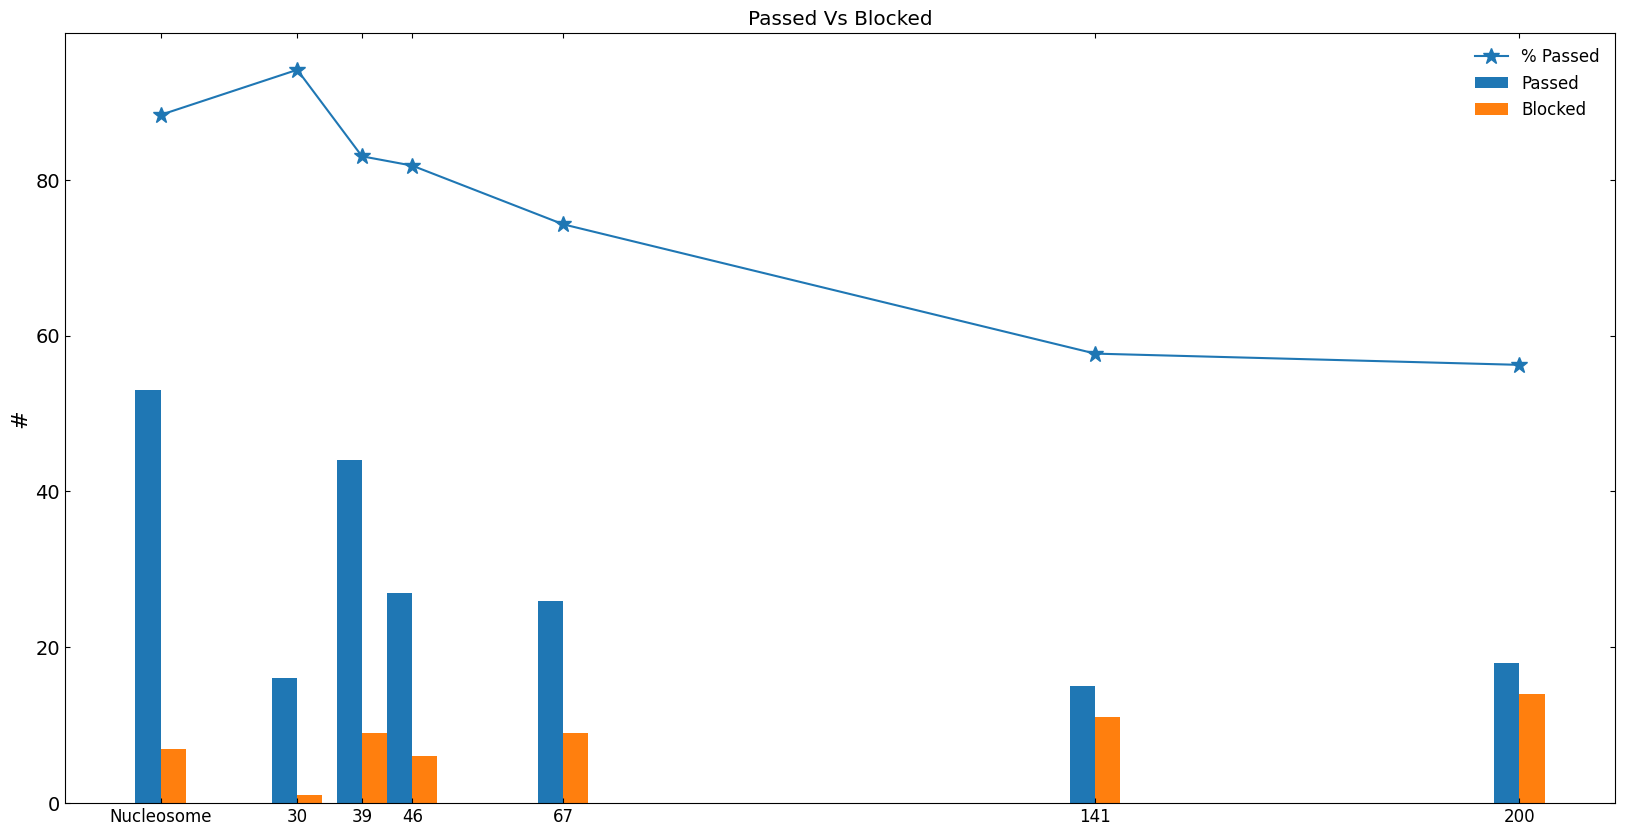

In [20]:
sheetnames_labels = ["Nucleosome", "30", "39", "46", "67", "141", "200"] # in nm

x = np.array([11, 30, 39, 46, 67, 141, 200])
x_ticks= x/10
# x = np.arange(len(sheetnames))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x_ticks - width/2, sheetnames_passed, width, label='Passed')
rects2 = ax.bar(x_ticks + width/2, sheetnames_blocked, width, label='Blocked')

#
total_events = np.array(sheetnames_passed )+ np.array(sheetnames_blocked)
fraction_passed = 100*np.array(sheetnames_passed) / total_events
ax.plot(x_ticks, fraction_passed,'*-', markersize=12, label='% Passed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('#')
ax.set_title('Passed Vs Blocked')
ax.set_xticks(x_ticks)
ax.set_xticklabels(sheetnames_labels, fontsize=12)
ax.legend()
plt.savefig('PassedVsBlocked-statistics.svg')

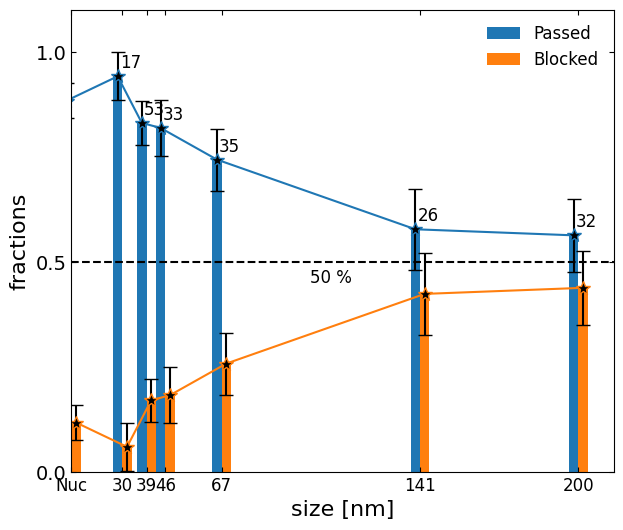

In [31]:
sheetnames_labels = ["Nuc", "30", "39", "46", "67", "141", "200"] # in nm

x = np.array([11, 30, 39, 46, 67, 141, 200])
x_ticks= x/10
# x = np.arange(len(sheetnames))  # the label locations
width = 0.35  # the width of the bars

total_events = np.array(sheetnames_passed )+ np.array(sheetnames_blocked)
fraction_passed = sheetnames_passed / total_events
fraction_passed_percent = fraction_passed * 100
fraction_passed_err = (1/total_events)*np.sqrt(total_events*fraction_passed*(1-fraction_passed))
fraction_passed_err_parcent = 100 * fraction_passed_err
fraction_blocked = sheetnames_blocked/total_events
fraction_blocked_err = (1/total_events)*np.sqrt(total_events*fraction_blocked*(1-fraction_blocked))
# ax.plot(x_ticks, fraction_passed_percent,'*-', markersize=12, label='% Passed')
fig, ax = plt.subplots(figsize=(7, 6))
rects1 = ax.bar(x_ticks - width/2, fraction_passed, width, label='Passed')
rects2 = ax.bar(x_ticks + width/2, fraction_blocked, width, label='Blocked')
ax.errorbar(x_ticks - width/2, fraction_passed, yerr=fraction_passed_err,
           fmt='-*', ms=10, capsize=5, ecolor='k', mfc='k')
ax.errorbar(x_ticks + width/2, fraction_blocked, yerr=fraction_blocked_err,
           fmt='-*', ms=10, capsize=5, ecolor='k', mfc='k')

# ax.errorbar(x_ticks, 100*fraction_passed, yerr=fraction_passed_err_parcent,
#            fmt='-*', ms=20, capsize=5, ecolor='k', mfc='k')

for i, txt in enumerate(total_events):
    ax.annotate(str(txt), (x_ticks[i]-0.1, fraction_passed[i]+0.02))
ax.axhline(y=0.5, color="black", linestyle='--')
ax.annotate('50 %', (10, 0.45))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(0, 1.1)
ax.set_xlim(2, None)
ax.set_xlabel("size [nm]")
ax.set_ylabel('fractions')
ax.set_xticks(x_ticks)
ax.set_yticks([0, 0.5, 1])
ax.set_xticklabels(sheetnames_labels, fontsize=12)
ax.legend()
plt.savefig('PassedVsBlocked-statistics.svg')

In [11]:
print(sheetnames_labels,'\n', fraction_passed, '\n', fraction_passed_err)
print(sheetnames_labels,'\n', fraction_blocked, '\n', fraction_blocked_err)

['Nuc', '30', '39', '46', '67', '141', '200'] 
 [0.88333333 0.94117647 0.83018868 0.81818182 0.74285714 0.57692308
 0.5625    ] 
 [0.04144385 0.05706721 0.05157435 0.06714081 0.07387642 0.09689067
 0.0876951 ]
['Nuc', '30', '39', '46', '67', '141', '200'] 
 [0.11666667 0.05882353 0.16981132 0.18181818 0.25714286 0.42307692
 0.4375    ] 
 [0.04144385 0.05706721 0.05157435 0.06714081 0.07387642 0.09689067
 0.0876951 ]


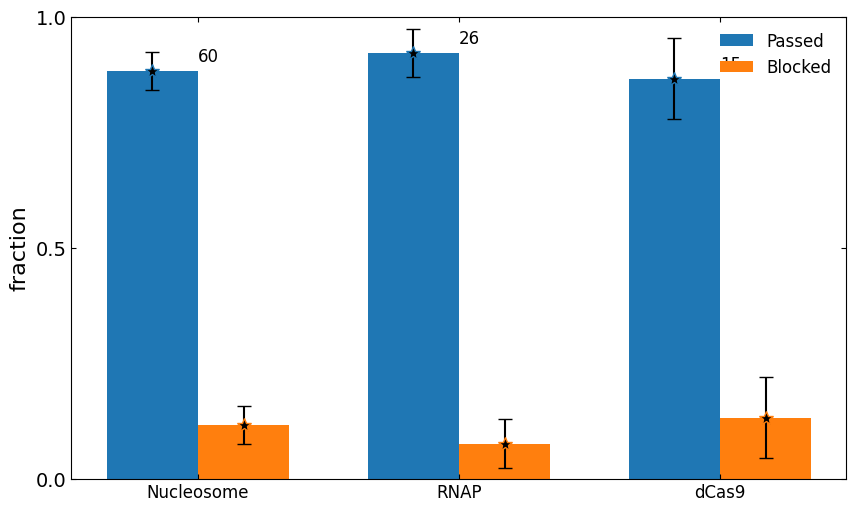

In [12]:
sheetnames_labels = ["Nucleosome", "RNAP", "dCas9"]
sheetnames_passed = []
sheetnames_blocked = []
for sheet in sheetnames_labels:
    df = pd.read_excel(filepath, sheet_name=sheet)
    df = df[df['name'].isnull().values == False] # remove NaN from name column, spaces are removed 
    df = df[df['Passed'].isnull().values == False] # remove NaN from Passed column, NAs are removed 
    df_passed = df[df['Passed'] == 1]
    df_blocked = df[df['Passed'] == 0]
    sheetnames_passed.append(df_passed.shape[0])
    sheetnames_blocked.append(df_blocked.shape[0])
sheetnames_passed = np.array(sheetnames_passed)
sheetnames_blocked = np.array(sheetnames_blocked)

x = np.array([10, 20, 30])
x_ticks= x/10
# x = np.arange(len(sheetnames))  # the label locations
width = 0.35  # the width of the bars

#
total_events = np.array(sheetnames_passed )+ np.array(sheetnames_blocked)
fraction_passed = np.array(sheetnames_passed) / total_events
fraction_passed_percent = fraction_passed * 100
fraction_passed_err = (1/total_events)*np.sqrt(total_events*fraction_passed*(1-fraction_passed))
fraction_passed_err_parcent = 100 * fraction_passed_err
fraction_blocked = sheetnames_blocked/total_events
fraction_blocked_err = (1/total_events)*np.sqrt(total_events*fraction_blocked*(1-fraction_blocked))

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x_ticks - width/2, fraction_passed, width, label='Passed')
rects2 = ax.bar(x_ticks + width/2, fraction_blocked, width, label='Blocked')
ax.errorbar(x_ticks - width/2, fraction_passed, yerr=fraction_passed_err,
           fmt='*', ms=10, capsize=5, ecolor='k', mfc='k')
ax.errorbar(x_ticks + width/2, fraction_blocked, yerr=fraction_blocked_err,
           fmt='*', ms=10, capsize=5, ecolor='k', mfc='k')

# ax.plot(x_ticks, fraction_passed_percent,'*-', markersize=12, label='% Passed')
# ax.errorbar(x_ticks, fraction_passed_percent, yerr=fraction_passed_err_parcent,
#            fmt='-*', ms=20, capsize=5)
# ax.axhline(y=80, color="black", linestyle='--')
# ax.annotate('80 % passage', (2, 75))
for i, txt in enumerate(total_events):
    ax.annotate(str(txt), (x_ticks[i], fraction_passed[i]+0.02))
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fraction')
plt.ylim(0, 1)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 0.5, 1])
ax.set_xticklabels(sheetnames_labels, fontsize=12)
ax.legend()
plt.savefig('PassedVsBlocked-statistics_proteins.svg')

In [13]:
print(sheetnames_labels, '\n',
     fraction_passed, '\n',
     fraction_passed_err, '\n')

['Nucleosome', 'RNAP', 'dCas9'] 
 [0.88333333 0.92307692 0.86666667] 
 [0.04144385 0.05225894 0.08777075] 



## Cohesin

Normal Cohesin 
 ['30 nm', '200 nm'] 
 [0.47368421 0.41176471] 
 Error [0.08099829 0.11936462] 

Single Chain Cohesin 
 ['30 nm', '200 nm'] 
 [0.40350877 0.4       ] 
 Error [0.0649817  0.10954451] 



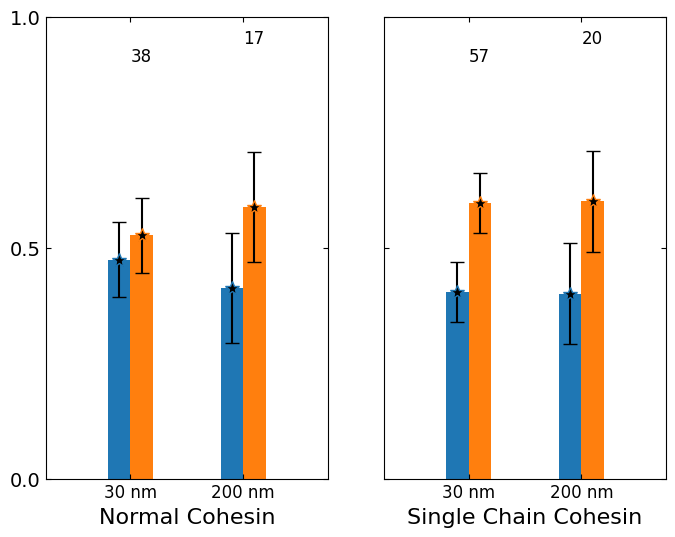

In [17]:
# fig params
x = np.array([10, 20])
x_ticks= x/10
# x = np.arange(len(sheetnames))  # the label locations
width = 0.2  # the width of the bars
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 6), sharey=True)


cohesin_lbls = ["30 nm", "200 nm"]

# Normal cohesin
cohesin_passed = np.array([18, 7])
cohesin_blocked = np.array([20, 10])
total_cohesin = cohesin_passed + cohesin_blocked
cohesin_passed_fraction  = cohesin_passed / total_cohesin
cohesin_passed_fraction_err = (1/total_cohesin)*np.sqrt(total_cohesin*cohesin_passed_fraction*(1-cohesin_passed_fraction))
cohesin_blocked_fraction  = cohesin_blocked / total_cohesin
cohesin_blocked_fraction_err = (1/total_cohesin)*np.sqrt(total_cohesin*cohesin_blocked_fraction*(1-cohesin_blocked_fraction))


rects1 = ax1.bar(x_ticks - width/2, cohesin_passed_fraction, width, label='Passed')
rects2 = ax1.bar(x_ticks + width/2, cohesin_blocked_fraction, width, label='Blocked')
ax1.errorbar(x_ticks - width/2, cohesin_passed_fraction, yerr=cohesin_passed_fraction_err,
           fmt='*', ms=10, capsize=5, ecolor='k', mfc='k')
ax1.errorbar(x_ticks + width/2, cohesin_blocked_fraction, yerr=cohesin_blocked_fraction_err,
           fmt='*', ms=10, capsize=5, ecolor='k', mfc='k')
for i, txt in enumerate(total_cohesin):
    ax1.annotate(str(txt), (x_ticks[i], fraction_passed[i]+0.02))
ax1.set_ylim(0, 1)
ax1.set_xlim(x_ticks[0]-x_ticks.mean()/2, x_ticks[1]+x_ticks.mean()/2)
ax1.set_xlabel('Normal Cohesin')
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(cohesin_lbls, fontsize=12)
ax1.set_yticks([0, 0.5 ,1])

print("Normal Cohesin \n",
    cohesin_lbls, '\n',
     cohesin_passed_fraction, '\n Error',
     cohesin_passed_fraction_err, '\n')

# single chain cohesin
single_cohesin_passed = np.array([23, 8])
single_cohesin_blocked = np.array([34, 12])
total_single_cohesin = single_cohesin_passed + single_cohesin_blocked
single_cohesin_passed_fraction  = single_cohesin_passed / total_single_cohesin
single_cohesin_passed_fraction_err = (1/total_single_cohesin)*np.sqrt(total_single_cohesin*single_cohesin_passed_fraction*(1-single_cohesin_passed_fraction))
single_cohesin_blocked_fraction  = single_cohesin_blocked / total_single_cohesin
single_cohesin_blocked_fraction_err = (1/total_single_cohesin)*np.sqrt(total_single_cohesin*single_cohesin_blocked_fraction*(1-single_cohesin_blocked_fraction))

rects1 = ax2.bar(x_ticks - width/2, single_cohesin_passed_fraction, width, label='Passed')
rects2 = ax2.bar(x_ticks + width/2, single_cohesin_blocked_fraction, width, label='Blocked')
ax2.errorbar(x_ticks - width/2, single_cohesin_passed_fraction, yerr=single_cohesin_passed_fraction_err,
           fmt='*', ms=10, capsize=5, ecolor='k', mfc='k')
ax2.errorbar(x_ticks + width/2, single_cohesin_blocked_fraction, yerr=single_cohesin_blocked_fraction_err,
           fmt='*', ms=10, capsize=5, ecolor='k', mfc='k')
for i, txt in enumerate(total_single_cohesin):
    ax2.annotate(str(txt), (x_ticks[i], fraction_passed[i]+0.02))
ax2.set_ylim(0, 1)
ax2.set_xlim(x_ticks[0]-x_ticks.mean()/2, x_ticks[1]+x_ticks.mean()/2)
ax2.set_xlabel('Single Chain Cohesin')
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(cohesin_lbls, fontsize=12)
ax2.set_yticks([0, 0.5 ,1])
print("Single Chain Cohesin \n",
    cohesin_lbls, '\n',
     single_cohesin_passed_fraction, '\n Error',
     single_cohesin_passed_fraction_err, '\n')

plt.savefig('cohesin_passed_statistics.svg')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

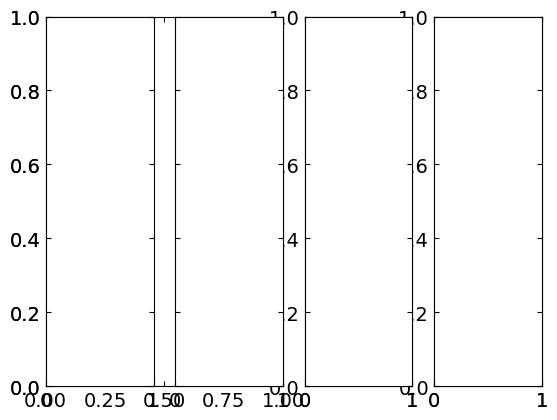

In [15]:
fig, axs = plt.subplots()
nrows=1
ncols=4
ax1 = plt.subplot2grid((nrows, ncols), (0, 0), colspan=2)
ax2 = plt.subplot2grid((nrows, ncols), (0, 2), colspan=1)
ax3 = plt.subplot2grid((nrows, ncols), (0, 3), colspan=1)
gs = ax1.get_gridspec()
gs.subplots(sharey='row')

## Stalling times

In [16]:
sheetnames_labels = ["Nucleosome", "RNAP", "dCas9", "10nmAuNP", "20nmAuNP", "200nmPSB"]

xl = pd.ExcelFile(filepath)
print(xl.sheet_names)
stalling_times_of_sh_names = []
stalling_times_of_sh_names_lbls = []
fraction_stalling_sh_names = []
total_events_sh_names = []
for sh_name in sheetnames_labels:
#     sh_name = sheetnames_labels[0]
    # sh_name = '20nmAuNP'
    df = xl.parse(sh_name)
    df = df[df['name'].isnull().values == False] # remove NaN from name column, spaces are removed 
    df = df[df['Passed'].isnull().values == False] # remove NaN from Passed column, NAs are removed
    df_passed = df[df['Passed'] == 1]
    df_blocked = df[df['Passed'] == 0]
    stalling_times = df["StallingTime/s"][df["StallingTime/s"].isnull().values == False].values
    stalling_times_nonzero = stalling_times[stalling_times>0]
    total_events_sh_names.append(len(df))
    if len(stalling_times_nonzero) > 0:
        print('stalling times : \n', stalling_times_nonzero)
        fraction_stalling = len(stalling_times_nonzero) / (len(df))
        fraction_stalling_sh_names.append(fraction_stalling)
        print('stalling fraction for ',sh_name, ': ', fraction_stalling)
        print('Average stalling time for ',sh_name, ': ', np.mean(stalling_times_nonzero))
        stalling_times_of_sh_names.extend(stalling_times_nonzero)
        stalling_times_of_sh_names_lbls.extend(np.array(len(stalling_times_nonzero)*[sh_name]))
    else:
        fraction_stalling_sh_names.append(0)
        stalling_times_of_sh_names.extend(np.array([0]))
        stalling_times_of_sh_names_lbls.extend(np.array([sh_name]))

        
df_stallingtimes = pd.DataFrame([stalling_times_of_sh_names_lbls, stalling_times_of_sh_names]).T
df_stallingtimes.columns = ["roadblock", "Stalling time"]
df_stallingtimes["Stalling time"] = pd.to_numeric(df_stallingtimes["Stalling time"])
df_stallingtimes

['GoodData', '200nmPSB', '100nmAuNP', '10nmAuNP', '50nmAuNP', '30nmAuNP', '20nmAuNP', 'Nucleosome', 'RNAP', 'dCas9', 'Qdots']
stalling times : 
 [ 8.   7.   8.  22.  12.5]
stalling fraction for  Nucleosome :  0.08333333333333333
Average stalling time for  Nucleosome :  11.5
stalling times : 
 [51.  4.]
stalling fraction for  10nmAuNP :  0.11764705882352941
Average stalling time for  10nmAuNP :  27.5
stalling times : 
 [42.  8. 15.  3.  2.  3.  5. 13. 25. 35.]
stalling fraction for  20nmAuNP :  0.18867924528301888
Average stalling time for  20nmAuNP :  15.1
stalling times : 
 [125.  10.  26.   4.  29.]
stalling fraction for  200nmPSB :  0.14285714285714285
Average stalling time for  200nmPSB :  38.8


,roadblock,Stalling time
0,Nucleosome,8.0
1,Nucleosome,7.0
2,Nucleosome,8.0
3,Nucleosome,22.0
4,Nucleosome,12.5
5,RNAP,0.0
6,dCas9,0.0
7,10nmAuNP,51.0
8,10nmAuNP,4.0
9,20nmAuNP,42.0


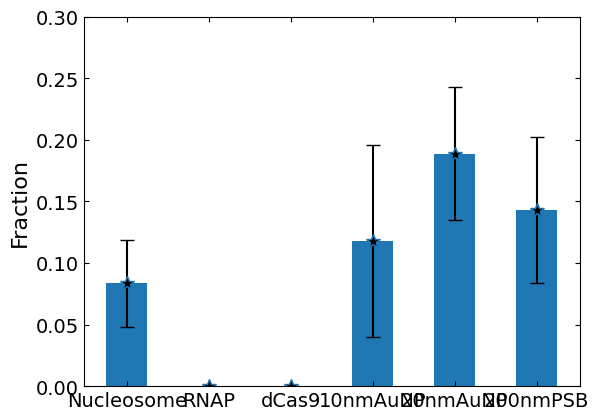

In [17]:
fraction_stalling_sh_names = np.array(fraction_stalling_sh_names)
total_events_sh_names = np.array(total_events_sh_names)

plt.bar(sheetnames_labels, fraction_stalling_sh_names, width=0.5)
fraction_stalling_sh_names_errbar = (1/total_events_sh_names)*np.sqrt(total_events_sh_names*fraction_stalling_sh_names*(1-fraction_stalling_sh_names))
plt.errorbar(sheetnames_labels, fraction_stalling_sh_names, fraction_stalling_sh_names_errbar, fmt='*', ms=10, capsize=5, ecolor='k', mfc='k')
plt.ylim(0, 0.3)
plt.ylabel("Fraction")
plt.savefig('StallingFraction.svg')

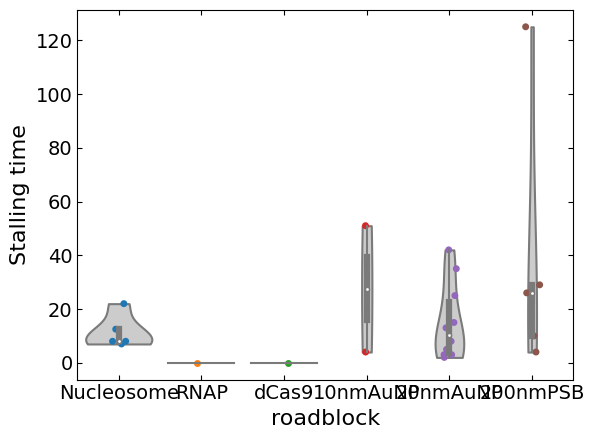

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection


ax = sns.violinplot(x="roadblock", y="Stalling time" , data=df_stallingtimes, color=".8", cut=0)
# ax = sns.violinplot(x="day", y="total_bill", data=tips, color=".8")

for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

sns.stripplot(x="roadblock", y="Stalling time", data=df_stallingtimes, jitter=True, ax=ax)

# plt.show()
# plt.yscale('log')
plt.savefig('StallingTimes.svg')

19.0625 +- 26.4494236396479
time constant:  14.802382670421698 +- 1.701065417669313


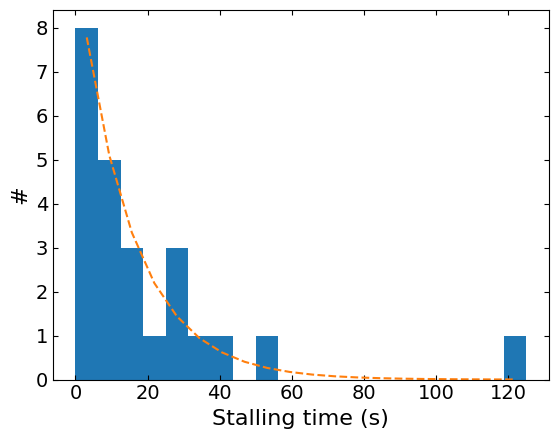

In [20]:
results = plt.hist(df_stallingtimes["Stalling time"], bins=20)
print(df_stallingtimes["Stalling time"].mean(), '+-', df_stallingtimes["Stalling time"].std())
xs = results[1][:-1]
ys = results[0]
# fitting
import scipy.optimize
def monoExp(x, m, t):
    return m * np.exp(-x/t)
p0 = (1, 10) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t = params
m_err, t_err = np.sqrt(np.diag(cv))
plt.plot(xs + (xs[1]-xs[0])/2, monoExp(xs, m, t), '--', label="fitted")
print('time constant: ', t, '+-', t_err)
plt.xlabel('Stalling time (s)')
plt.ylabel('#')
plt.savefig('stalling_all_hist.svg')
# plt.xscale('log')

In [40]:
bins[1]

array([  0.  ,   6.25,  12.5 ,  18.75,  25.  ,  31.25,  37.5 ,  43.75,
        50.  ,  56.25,  62.5 ,  68.75,  75.  ,  81.25,  87.5 ,  93.75,
       100.  , 106.25, 112.5 , 118.75, 125.  ])

In [34]:
df_stallingtimes.groupby("roadblock").mean()

,Stalling time
roadblock,
10nmAuNP,27.5
200nmPSB,38.8
20nmAuNP,15.1
Nucleosome,11.5
RNAP,0.0
dCas9,0.0


## Different scenarios

In [16]:
file_passing = 'sample_data/data_diff_scenarios_roadblocks/x228-y878-l57-w64-a0d-f0-f3218_shifted_2.5dx_2.1dy_analysis_passing_20nm.hdf5'
file_blocking = 'sample_data/data_diff_scenarios_roadblocks/x223-y928-l69-w71-a0d-f0-f5000_analysis_blocking.hdf5'
file_starts_on_roadblock = 'sample_data/data_diff_scenarios_roadblocks/x581-y205-l56-w141-a0d-f0-f5000_analysis_startsonroadblock_20nm.hdf5'
file_stallingpassing = 'sample_data/data_diff_scenarios_roadblocks/x707-y123-l39-w64-a0d-f0-f5000_analysis_stallingpassing_30nm.hdf5'
file_noninteracting = 'sample_data/data_diff_scenarios_roadblocks/x470-y521-l58-w130-a0d-f0-f5000_analysis_noninteracting_20nm.hdf5'
filelist = [file_passing, file_blocking, file_stallingpassing, file_starts_on_roadblock, file_noninteracting]

In [17]:
h5 = h5py.File(file_passing, 'r')
print(h5.keys())
h5.close()

<KeysViewHDF5 ['Left Kymograph', 'Left Kymograph Loop', 'Left Kymograph No Loop', 'Left Linked Peaks', 'Left Linked Peaks Analyzed', 'Left Max Peaks', 'Right Kymograph', 'Right Kymograph Loop', 'Right Kymograph No Loop', 'Right Linked Peaks', 'Right Max Peaks', 'Two Colors Linked', 'filepath', 'parameters']>


In [18]:
with h5py.File(file_passing, 'r') as h5:
    df_peaks_max = pd.DataFrame(h5["Left Max Peaks"][...])
    df_peaks_linked = pd.DataFrame(h5['Left Linked Peaks'][...])
    df_peaks_linked_sm = pd.DataFrame(h5['Right Linked Peaks'][...])
    loop_region_left = h5['parameters']['Region Errbar'][0]
    loop_region_right = h5['parameters']['Region Errbar'][1]


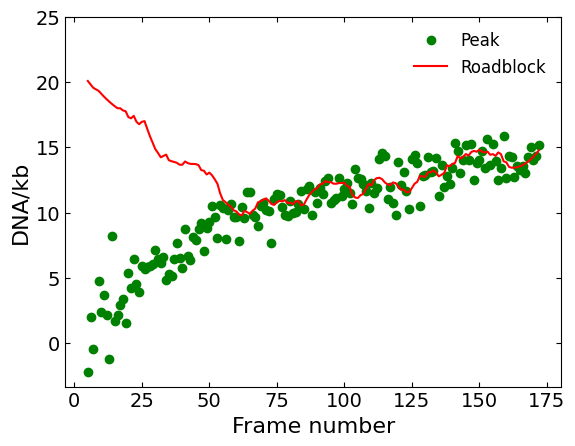

In [19]:
df_gb = df_peaks_linked.groupby("particle")
group_sel = df_gb.get_group(1)
group_sel = group_sel.reset_index(drop=True)
peak_analyzed_dict = kymograph.analyze_maxpeak(group_sel, smooth_length=7,
        frame_width = loop_region_right - loop_region_left,
        dna_length=48.5, pix_width=13,)
df_peak_analyzed = peak_analyzed_dict["Max Peak"]


df_gb = df_peaks_linked_sm.groupby("particle")
group_sel = df_gb.get_group(1)
group_sel = group_sel.reset_index(drop=True)
peak_analyzed_dict_sm = kymograph.analyze_maxpeak(group_sel, smooth_length=7,
        frame_width = loop_region_right - loop_region_left,
        dna_length=48.5, pix_width=13)#pix_width=self.dna_puncta_size,
sel_loop_sm_dict = kymograph.loop_sm_dist(peak_analyzed_dict, peak_analyzed_dict_sm, smooth_length=21)

plt.plot(df_peak_analyzed["FrameNumber"],
        df_peak_analyzed["PeakIntensity"], '.g', markersize=12, label='Peak')
plt.plot(sel_loop_sm_dict["FrameNumber"], sel_loop_sm_dict["PeakDiffFiltered"], 'r', label='Roadblock')
plt.xlabel('Frame number')
plt.ylabel('DNA/kb')
plt.legend()
plt.ylim(None, 25)
plt.savefig('passing_kinetics.svg')


In [20]:
def get_msd_from_hdf5(filepath_hdf5, particle_no=1):
    with h5py.File(filepath_hdf5, 'r') as h5:
        df_peaks_max = pd.DataFrame(h5["Left Max Peaks"][...])
        df_peaks_linked = pd.DataFrame(h5['Left Linked Peaks'][...])
        df_peaks_linked_sm = pd.DataFrame(h5['Right Linked Peaks'][...])
        loop_region_left = h5['parameters']['Region Errbar'][0]
        loop_region_right = h5['parameters']['Region Errbar'][1]
        df_gb = df_peaks_linked_sm.groupby("particle")
        group_sel_col2 = df_gb.get_group(particle_no)
        group_sel_col2 = group_sel_col2.reset_index(drop=True)
        n=50
        ind = int(n/2)
        msd_moving = kymograph.msd_moving(group_sel_col2['x'].values, n=n)
        frames = group_sel_col2['FrameNumber'].values[ind:-ind]
    return frames, msd_moving

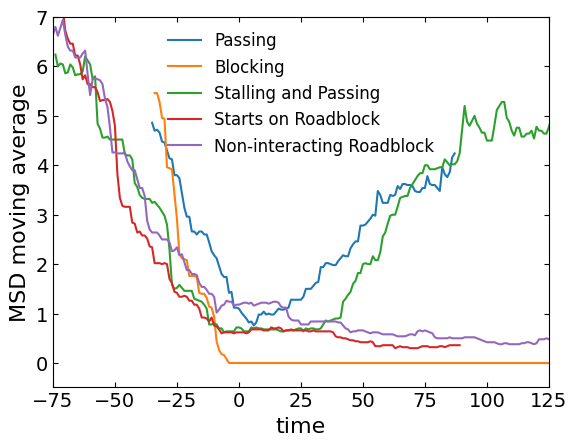

In [21]:
frames, msd_moving = get_msd_from_hdf5(file_passing)
plt.plot(frames-60, msd_moving, label='Passing')

frames, msd_moving = get_msd_from_hdf5(file_blocking)
plt.plot(frames[40:]-100, msd_moving[40:], label='Blocking')


frames, msd_moving = get_msd_from_hdf5(file_stallingpassing)
plt.plot(frames-100, msd_moving, label='Stalling and Passing')

frames, msd_moving = get_msd_from_hdf5(file_starts_on_roadblock)
plt.plot(frames-100, msd_moving, label='Starts on Roadblock')

frames, msd_moving = get_msd_from_hdf5(file_noninteracting)
plt.plot(frames-150, msd_moving, label='Non-interacting Roadblock')

plt.xlabel('time')
plt.ylabel('MSD moving average')
plt.legend()
plt.xlim(-75, 125)
plt.ylim(None, 7)
plt.savefig('MSD_diff_scenarios.svg', transparent=True)

In [22]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

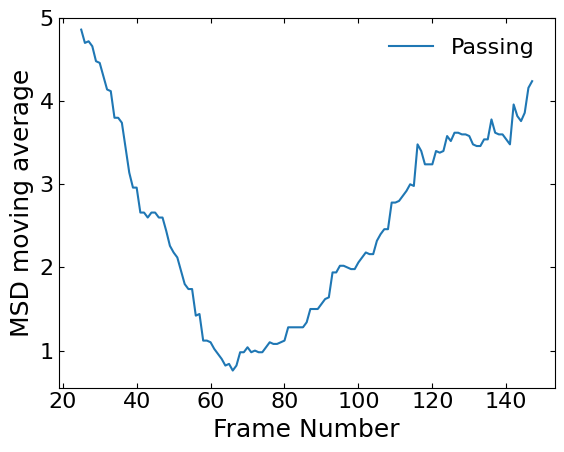

In [23]:
frames, msd_moving = get_msd_from_hdf5(file_passing)
plt.plot(frames, msd_moving, label='Passing')

plt.xlabel('Frame Number')
plt.ylabel('MSD moving average')
plt.legend()
# plt.xlim(-75, 125)
plt.ylim(None, 5)
plt.savefig('MSD_passing.svg')